In [18]:
from models.cnn import ConvolutionalNeuralNetwork
from data_helper import DataHelper
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import LSTM
from keras.layers import ConvLSTM2D
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dh = DataHelper()
dh.get_all_columns_names()

Index(['pool', 'lines_reserved', 'time', 'day_of_week', 'month', 'day', 'hour',
       'minute', 'holiday', 'reserved_Lavoda', 'reserved_Club Junior',
       'reserved_Elab', 'reserved_Vodnik', 'reserved_Spirala',
       'reserved_Amalka', 'reserved_Dukla', 'reserved_Lodicka',
       'reserved_Elab team', 'reserved_Sports Team', 'reserved_Modra Hvezda',
       'reserved_VSC MSMT', 'reserved_Orka', 'reserved_Activity',
       'reserved_Aquamen', 'reserved_Zralok', 'reserved_SK Impuls',
       'reserved_Motylek', 'reserved_3fit', 'reserved_Jitka Vachtova',
       'reserved_Hodbod', 'reserved_DUFA', 'reserved_The Swim',
       'reserved_Neptun', 'reserved_Strahov Cup', 'reserved_Apneaman',
       'reserved_Michovsky', 'reserved_Betri', 'reserved_Pospisil',
       'reserved_Vachtova', 'reserved_Riverside', 'reserved_Vodni polo Sparta',
       'reserved_Road 2 Kona', 'reserved_Water Polo Sparta Praha',
       'reserved_Sucha', 'reserved_Totkovicova', 'reserved_DDM Spirala',
       'reserved

In [4]:
columns = ['pool','lines_reserved','day_of_week','month','minute_of_day','year','reserved_Vodnik'] 
# columns = list(dh.get_all_columns_names())
# columns.remove('time')
time_steps_back = 5
x_train, y_train, x_test, y_test = dh.generate_feature_vectors_for_cnn(columns, time_steps_back)

In [5]:
estimator = ConvolutionalNeuralNetwork()
estimator.time_steps_back = time_steps_back
estimator.columns = columns
estimator.build_model()
print(estimator.model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 4, 64)             960       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 2, 64)             0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               12900     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 13,961
Trainable params: 13,961
Non-trainable params: 0
_________________________________________________________________
None


In [20]:
n_features = len(estimator.columns)
estimator.model = Sequential()
# estimator.model.add(Flatten(input_shape=(estimator.time_steps_back, n_features)))
# estimator.model.add(Dense(int(estimator.time_steps_back*n_features), activation='relu'))
# estimator.model.add(Dropout(0.2))
# estimator.model.add(Dense(int(estimator.time_steps_back*n_features), activation='relu'))
# estimator.model.add(Dropout(0.2))
# estimator.model.add(Dense(int(estimator.time_steps_back*n_features), activation='relu'))

# estimator.model.add(Conv1D(filters=120, kernel_size=2, activation='relu', input_shape=(time_steps_back, n_features)))
# estimator.model.add(MaxPooling1D(pool_size=2))
# estimator.model.add(Conv1D(filters=60, kernel_size=2, activation='relu'))
# estimator.model.add(Dropout(0.2))
# estimator.model.add(Flatten())
# estimator.model.add(Dense(100, activation='relu'))
# estimator.model.add(Dense(1))
# estimator.model.compile(optimizer='adam', loss='mse')

# estimator.model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(time_steps_back, n_features)))
# estimator.model.add(LSTM(50, activation='relu'))

estimator.model.add(LSTM(50, activation='relu', input_shape=(time_steps_back, n_features)))


estimator.model.add(Dense(1))
estimator.model.compile(optimizer='adam', loss='mse')
print(estimator.model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 50)                11600     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 51        
Total params: 11,651
Trainable params: 11,651
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
estimator.fit(x_train, y_train, 5)
#estimator.load_model()

Train on 70393 samples, validate on 30169 samples
Epoch 1/5
70393/70393 [==============================] - 48s 680us/step - loss: 0.0018 - val_loss: 0.0013
Epoch 2/5
70393/70393 [==============================] - 48s 682us/step - loss: 8.0508e-04 - val_loss: 8.8194e-04
Epoch 3/5
70393/70393 [==============================] - 48s 679us/step - loss: 7.6451e-04 - val_loss: 8.8442e-04
Epoch 4/5
70393/70393 [==============================] - 48s 687us/step - loss: 7.5033e-04 - val_loss: 8.8128e-04
Epoch 5/5
70393/70393 [==============================] - 48s 682us/step - loss: 7.2625e-04 - val_loss: 8.4280e-04
CNN model saved to disk


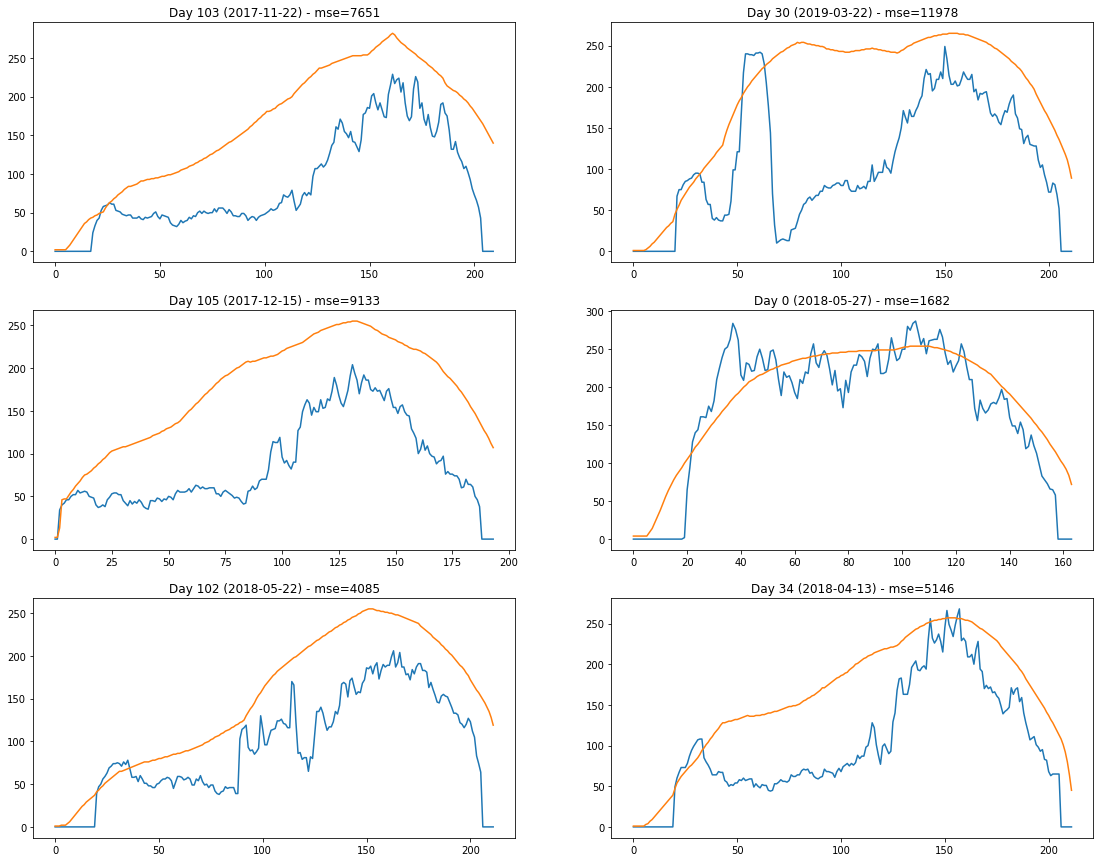

In [22]:
dh.show_n_days_prediction(estimator.model, columns, 6, time_steps_back, True)